## Principal Component Analysis Data

In [1]:
#import statements
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 100)

## Functions

In [3]:
from sklearn.decomposition import PCA
# Function:    PrincipalComponentAnalysis
# Input:       dataset
# Returns:     top ratios and corresponding feature 
#              names for Principal Component Analysis
# URL:         https://stackoverflow.com/questions/22984335/recovering-features-names-of-explained-variance-ratio-in-pca-with-sklearn
def PrincipalComponentAnalysis(data):
    number_of_columns = data.shape[1]
    initial_feature_names = data.columns
        
    for x in range(number_of_columns):
        pca = PCA(n_components = x)
        pca.fit_transform(data)
        pca_ratios = pca.explained_variance_ratio_
        
        # block of code for returning corresponding feature names.
        most_important = [np.abs(pca.components_[i]).argmax() for i in range(x)]
        pca_names = [initial_feature_names[most_important[i]] for i in range(x)]
        
        # set the PCA threshold value
        if sum(pca_ratios) >= .85:
            break
    return pca_ratios, pca_names

In [4]:
import matplotlib.pyplot as plt
# Function:    screePlot
# Input:       dataset
# Output:      Scree Plot
# URL:         https://medium.com/@sercandogan/why-scree-plot-is-important-in-pca-a66cd7dcd624
def screePlot(data):
    number_of_columns = data.shape[1]
    
    # Calculate Eigen Values
    for x in range(number_of_columns):
        pca = PCA(n_components = x)
        pca.fit_transform(data)
        eigen_values = pca.explained_variance_

    total = sum(eigen_values)
    var_exp = [(i/total) for i in sorted(eigen_values, reverse=True)]
    cum_var_exp = np.cumsum(var_exp)
    
    # Plot Graph
    plt.plot(cum_var_exp)
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');

#### Read in the Data

In [5]:
# Read HR_Employee.csv
X = pd.read_csv('./Data/HR_Employee.csv')
X

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Education_Bachelor,Education_Below College,Education_College,Education_Doctor,Education_Master,EnvironmentSatisfaction_High,EnvironmentSatisfaction_Low,EnvironmentSatisfaction_Medium,EnvironmentSatisfaction_Very High,JobInvolvement_High,JobInvolvement_Low,JobInvolvement_Medium,JobInvolvement_Very High,JobSatisfaction_High,JobSatisfaction_Low,JobSatisfaction_Medium,JobSatisfaction_Very High,PerformanceRating_Excellent,PerformanceRating_Outstanding,RelationshipSatisfaction_High,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,WorkLifeBalance_Bad,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.547619,0.715820,0.000000,0.914286,0.698053,0.888889,0.000000,0.000000,0.200,0.000000,0.150,0.222222,0.000000,0.294118,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,0.738095,0.126700,0.250000,0.442857,0.916001,0.111111,0.857143,0.333333,0.250,0.500000,0.250,0.388889,0.066667,0.411765,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,0.452381,0.909807,0.035714,0.885714,0.012126,0.666667,0.285714,0.000000,0.175,0.500000,0.000,0.000000,0.000000,0.000000,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,0.357143,0.923407,0.071429,0.371429,0.845814,0.111111,0.000000,0.000000,0.200,0.500000,0.200,0.388889,0.200000,0.000000,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,0.214286,0.350036,0.035714,0.142857,0.583738,1.000000,0.071429,0.333333,0.150,0.500000,0.050,0.111111,0.133333,0.117647,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.559771,0.785714,0.157143,0.409396,0.444444,0.428571,0.333333,0.425,0.500000,0.125,0.111111,0.000000,0.176471,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1466,0.500000,0.365784,0.178571,0.171429,0.777474,0.444444,0.285714,0.333333,0.225,0.833333,0.175,0.388889,0.066667,0.411765,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1467,0.214286,0.037938,0.107143,0.814286,0.123670,0.111111,0.642857,0.333333,0.150,0.000000,0.150,0.111111,0.000000,0.176471,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1468,0.738095,0.659270,0.035714,0.471429,0.447661,0.222222,0.214286,0.000000,0.425,0.500000,0.225,0.333333,0.000000,0.470588,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [6]:
# Testing PrincipalComponentAnalysis Function
pca_ratios, pca_names = PrincipalComponentAnalysis(X)

In [7]:
# Printing Feature Names
pca_names

['Department_Research & Development',
 'Gender_Female',
 'MaritalStatus_Married',
 'OverTime_No',
 'JobInvolvement_High',
 'EducationField_Life Sciences',
 'WorkLifeBalance_Better',
 'Education_Bachelor',
 'BusinessTravel_Travel_Rarely',
 'JobSatisfaction_Very High',
 'RelationshipSatisfaction_High',
 'EnvironmentSatisfaction_High',
 'JobSatisfaction_High',
 'MaritalStatus_Divorced',
 'RelationshipSatisfaction_Medium',
 'EnvironmentSatisfaction_Medium',
 'JobSatisfaction_High',
 'Education_College',
 'RelationshipSatisfaction_Low',
 'JobSatisfaction_Medium',
 'EnvironmentSatisfaction_Low',
 'JobRole_Research Scientist',
 'JobRole_Laboratory Technician',
 'WorkLifeBalance_Best',
 'Education_Below College',
 'EducationField_Medical',
 'JobInvolvement_Very High',
 'BusinessTravel_Non-Travel',
 'Department_Human Resources']

In [8]:
# Printing Ratios
pca_ratios

array([0.06978558, 0.0534603 , 0.04595761, 0.04501098, 0.04187267,
       0.04068225, 0.03869525, 0.03657927, 0.03598324, 0.03515765,
       0.03335486, 0.03257381, 0.03101468, 0.03018848, 0.02644722,
       0.02625779, 0.02508378, 0.02428917, 0.02171866, 0.02134657,
       0.02068758, 0.01975344, 0.01826973, 0.01556166, 0.01515078,
       0.01455547, 0.01379959, 0.0133176 , 0.01223978])

### PCA Summary

In [10]:
pca_sum = sum(pca_ratios)
pca_length = len(pca_ratios)

print(str(pca_length) + ' Attributes Accounted For ' + "{:.2f}".format(pca_sum) + ' Of The Variance\n')

for i in range(pca_length):
    print("{:<38}{:.2f}".format(pca_names[i]+':', pca_ratios[i]))

29 Attributes Accounted For 0.86 Of The Variance

Department_Research & Development:    0.07
Gender_Female:                        0.05
MaritalStatus_Married:                0.05
OverTime_No:                          0.05
JobInvolvement_High:                  0.04
EducationField_Life Sciences:         0.04
WorkLifeBalance_Better:               0.04
Education_Bachelor:                   0.04
BusinessTravel_Travel_Rarely:         0.04
JobSatisfaction_Very High:            0.04
RelationshipSatisfaction_High:        0.03
EnvironmentSatisfaction_High:         0.03
JobSatisfaction_High:                 0.03
MaritalStatus_Divorced:               0.03
RelationshipSatisfaction_Medium:      0.03
EnvironmentSatisfaction_Medium:       0.03
JobSatisfaction_High:                 0.03
Education_College:                    0.02
RelationshipSatisfaction_Low:         0.02
JobSatisfaction_Medium:               0.02
EnvironmentSatisfaction_Low:          0.02
JobRole_Research Scientist:           0.02
JobR

### Scree Plot

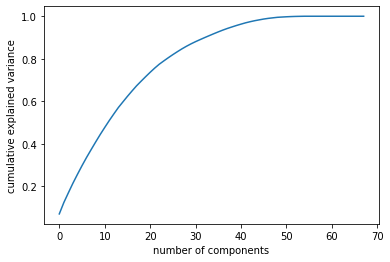

In [11]:
screePlot(X)

### Saving To CSV

In [13]:
X[pca_names].to_csv('./Data/PCA_HR_Employee.csv', index = False)